In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [9]:
"""
Read all .xlsx files from a specified folder into an array of pandas DataFrames.
    
    Parameters:
    folder_path (str): Path to the folder containing Excel files
    
    Returns:
    list: A list of pandas DataFrames, one for each .xlsx file
    """
folder_path = 'Y:\\Car Rental\\Localiza\\basket'

dataframes = []
dates = []
    
    # Get all .xlsx files in the folder
excel_files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

parsed_files = []
    # Sort files to ensure consistent order
excel_files.sort()

for file in excel_files:
        try:
            # Extract date from filename (assuming format dd-mm-yy.xlsx)
            date_str = file.replace('.xlsx', '')
            file_date = datetime.strptime(date_str, '%d-%m-%y')
            parsed_files.append((file, file_date))
        except ValueError:
            print(f"Skipping file {file} - does not match expected date format")

parsed_files.sort(key=lambda x: x[1])

    # Read each Excel file
for file,file_date in parsed_files:
    file_path = os.path.join(folder_path, file)
    try:
            # Read the Excel file
        df = pd.read_excel(file_path)
            
            # Optionally, add the filename as a column or attribute
        df.filename = file
        df.file_date = file_date    
        dataframes.append(df)
        dates.append(file_date)
        print(f"Successfully read: {file}")
    except Exception as e:
        print(f"Error reading {file}: {e}")
    
print(dataframes)
print(dates)


Successfully read: 23-01-25.xlsx
Successfully read: 24-01-25.xlsx
Successfully read: 27-01-25.xlsx
Successfully read: 28-01-25.xlsx
Successfully read: 29-01-25.xlsx
Successfully read: 31-01-25.xlsx
Successfully read: 04-02-25.xlsx
Successfully read: 06-02-25.xlsx
Successfully read: 10-02-25.xlsx
Successfully read: 12-02-25.xlsx
Successfully read: 17-02-25.xlsx
Successfully read: 19-02-25.xlsx
Successfully read: 24-02-25.xlsx
Successfully read: 25-02-25.xlsx
Successfully read: 26-02-25.xlsx
Successfully read: 27-02-25.xlsx
Successfully read: 07-03-25.xlsx
Successfully read: 10-03-25.xlsx
Successfully read: 14-03-25.xlsx
Successfully read: 19-03-25.xlsx
Successfully read: 28-03-25.xlsx
[       Unnamed: 0      id brandDescription  \
0               0  178746       VOLKSWAGEN   
1               1  178885             FIAT   
2               2  178918          HYUNDAI   
3               3  178933             FIAT   
4               4  179091       VOLKSWAGEN   
...           ...     ...     

In [10]:
percentages = []
relevantyear = 2024
for df in dataframes:
    total = len(df)
    df = df[df['modelYear'] >=relevantyear]
    count = len(df)
    percentages.append(count/total)

display(percentages)
    

[0.5670833333333334,
 0.57075,
 0.5583333333333333,
 0.5264166666666666,
 0.5693333333333334,
 0.58575,
 0.5898333333333333,
 0.588,
 0.59425,
 0.6163333333333333,
 0.6260833333333333,
 0.6481666666666667,
 0.653,
 0.6621666666666667,
 0.6611666666666667,
 0.665,
 0.6784166666666667,
 0.6728333333333333,
 0.72825,
 0.7364166666666667,
 0.8135]

(array([20110., 20120., 20127., 20134., 20141., 20148., 20155., 20162.,
        20169.]),
 [Text(20110.0, 0, '2025-01-22'),
  Text(20120.0, 0, '2025-02-01'),
  Text(20127.0, 0, '2025-02-08'),
  Text(20134.0, 0, '2025-02-15'),
  Text(20141.0, 0, '2025-02-22'),
  Text(20148.0, 0, '2025-03-01'),
  Text(20155.0, 0, '2025-03-08'),
  Text(20162.0, 0, '2025-03-15'),
  Text(20169.0, 0, '2025-03-22')])

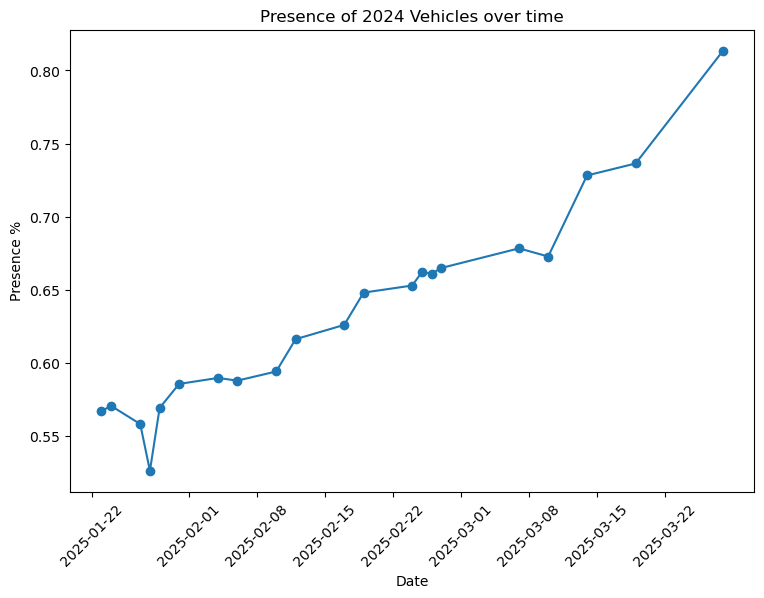

In [18]:
values = percentages
    
# 1. Line Plot
plt.figure(figsize=(30, 6))
plt.subplot(131)
plt.plot(dates, values, marker='o')
plt.title('Presence of 2024 Vehicles over time')
plt.xlabel('Date')
plt.ylabel(f'Presence %')
plt.xticks(rotation=45)